In [2]:
import pandas as pd

In [3]:
file_path=r"C:\Users\HP\Downloads\MachineLearningRating_v3 (1)\MachineLearningRating_v3.txt"

In [4]:
df=pd.read_csv(file_path,delimiter='|',encoding='utf-8',on_bad_lines='skip')

C:\Users\HP\AppData\Local\Temp\ipykernel_20096\3495012766.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path,delimiter='|',encoding='utf-8',on_bad_lines='skip')


In [5]:
df.to_csv("converted.csv",index=False)

In [6]:
df=pd.read_csv("converted.csv",encoding='utf-8',on_bad_lines='skip')
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_20096\347827983.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("converted.csv",encoding='utf-8',on_bad_lines='skip')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv("converted.csv", low_memory=False)

# Preview columns
print(df.columns.tolist())


['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


In [10]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')


In [11]:
threshold = len(df) * 0.9
df_cleaned = df.dropna(thresh=threshold, axis=1)


In [12]:
# Fill common missing values or drop if critical
df_cleaned['AccountType'].fillna('Unknown', inplace=True)
df_cleaned['Gender'].fillna('Unknown', inplace=True)
df_cleaned['VehicleType'].fillna('Unknown', inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_20096\1371484556.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['AccountType'].fillna('Unknown', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_20096\1371484556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AccountType'].fillna('Unknown', inplace=True)
C:\Users\

In [13]:
df_cleaned['LossRatio'] = df_cleaned['TotalClaims'] / df_cleaned['TotalPremium']
df_cleaned['LossRatio'].replace([np.inf, -np.inf], 0, inplace=True)
df_cleaned['LossRatio'].fillna(0, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_20096\3858342006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LossRatio'] = df_cleaned['TotalClaims'] / df_cleaned['TotalPremium']
C:\Users\HP\AppData\Local\Temp\ipykernel_20096\3858342006.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original

In [14]:
print(df_cleaned[['TotalPremium', 'TotalClaims', 'LossRatio']].describe())


       TotalPremium   TotalClaims     LossRatio
count  1.000098e+06  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01  2.163699e-01
std    2.302845e+02  2.384075e+03  7.304735e+00
min   -7.825768e+02 -1.200241e+04 -1.870012e+01
25%    0.000000e+00  0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00  0.000000e+00
max    6.528260e+04  3.930921e+05  2.553600e+03


In [15]:
print(df_cleaned.groupby('Province')['LossRatio'].mean().sort_values(ascending=False))


Province
Gauteng          0.262216
Limpopo          0.252857
Mpumalanga       0.235858
Western Cape     0.193640
North West       0.178830
KwaZulu-Natal    0.174868
Eastern Cape     0.152974
Northern Cape    0.116388
Free State       0.077792
Name: LossRatio, dtype: float64


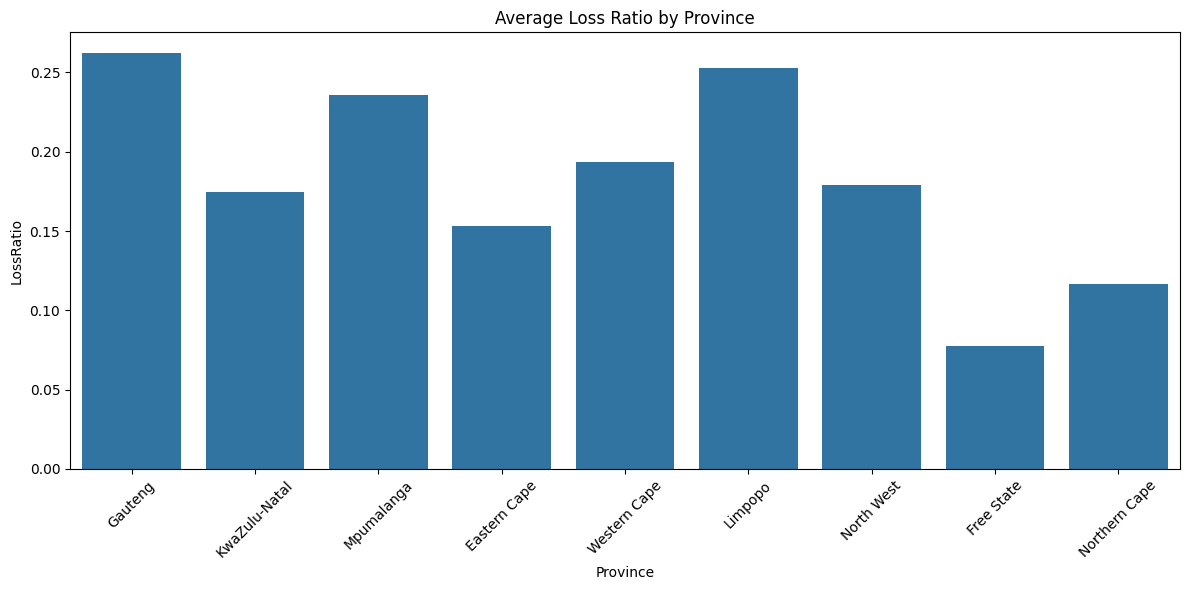

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_cleaned, x='Province', y='LossRatio', estimator='mean', errorbar=None)
plt.xticks(rotation=45)
plt.title("Average Loss Ratio by Province")
plt.tight_layout()
plt.show()


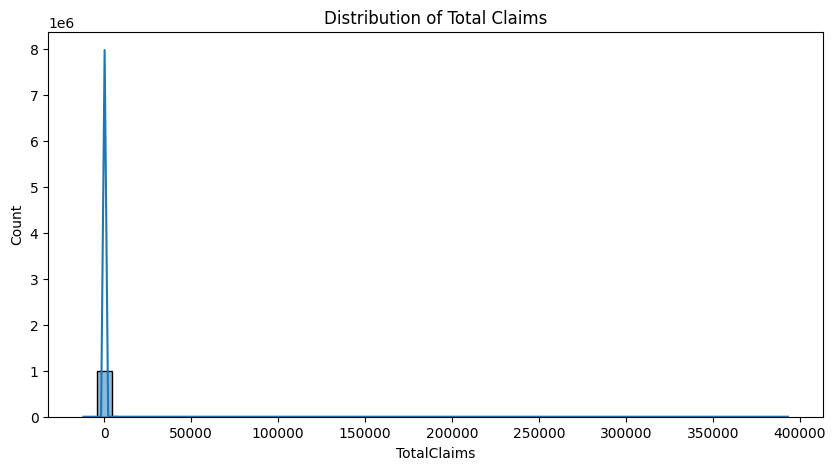

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['TotalClaims'], bins=50, kde=True)
plt.title("Distribution of Total Claims")
plt.xlabel("TotalClaims")
plt.show()


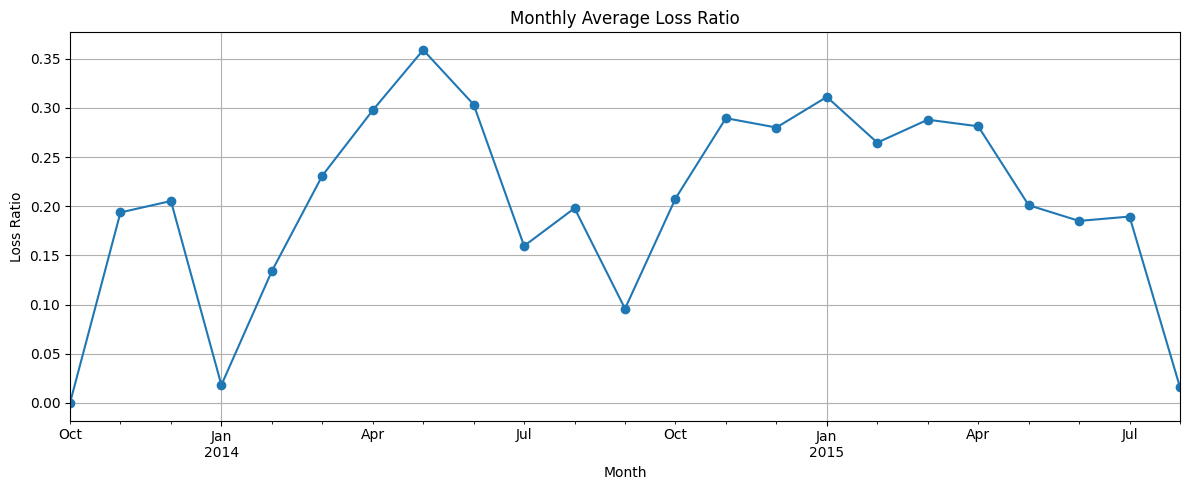

In [18]:
monthly_trend = df_cleaned.groupby(df_cleaned['TransactionMonth'].dt.to_period("M"))['LossRatio'].mean()
monthly_trend.plot(marker='o', figsize=(12,5))
plt.title("Monthly Average Loss Ratio")
plt.ylabel("Loss Ratio")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()
